In [2]:
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress, norm

from lib.lib_rates import *

Getting results from a stats file (output from multinest)

In [17]:
def get_run_stats(run_name, run_number):
    '''This function takes in a stats file from the Multinest output of a reactor run.
    It scrapes the mean and standard deviation of the plutonium rate measurement and returns them in a numpy array'''

    filename = f'out/{run_name}_run{run_number}stats.dat'
    
    pattern = r"\b5\s+([\d.E+-]+)\s+([\d.E+-]+)" # The 5 ensures that we are looking at the line for the plutonium rate

    with open(filename, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                stats = np.array([float(match.group(1)), float(match.group(2))])
                return stats*M_PU239*YEAR/KILOGRAM
    

These are the results for runs 1 to 5 (Ge detector @ 5m near a 1 GW PWR reactor)

In [4]:
filenames = [f'out/PWR_breeder_run{i}stats.dat' for i in range(1,5)]

Pu_rate_stats_list = []

for filename in filenames:
    Pu_rate_stats_list.append(get_run_stats(filename))

Pu_rate_stats = np.array(Pu_rate_stats_list)

4.402899239744484e-150


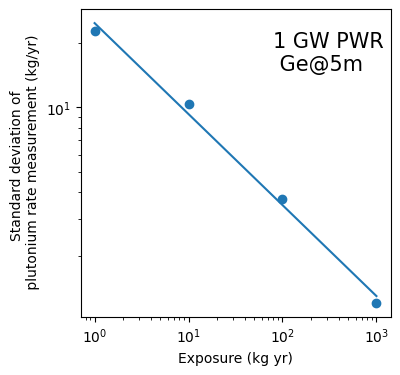

In [5]:
fig, ax = plt.subplots(figsize=(4,4,))

exposures = np.array([1, 10, 100, 1000])

std_devs = Pu_rate_stats.T[1]

# This does a linear regression of the log values of the exposures and standard deviations
slope, intercept, r_value, p_value, std_err = linregress(np.log(exposures), np.log(std_devs))

min_exposure = np.exp((150 - intercept)/slope)
print(min_exposure)

std_dev_preds = np.exp ( slope * np.log(exposures) + intercept ) 

ax.scatter(exposures, std_devs)
ax.plot(exposures, std_dev_preds)

ax.set_xlabel('Exposure (kg yr)')
ax.set_ylabel('Standard deviation of \n plutonium rate measurement (kg/yr)')

ax.text(8e1, 1.5e1, '1 GW PWR \n Ge@5m', fontsize=15)

ax.set_xscale('log')
ax.set_yscale('log')

Now looking at the stats for runs 8-11 (Ge, 1GW PWR @ 20m, no bg) and 12-15 ((Ge, 1GW PWR @ 20m, 160 dru flat bg))

In [19]:
run_name = 'PWR_breeder'

Pu_rate_stats_list_run8_to_11 = []

for run_number in range(8,12):
    Pu_rate_stats_list_run8_to_11.append(get_run_stats(run_name, run_number))

Pu_rate_stats_run8_to_11 = np.array(Pu_rate_stats_list_run8_to_11)

Pu_rate_stats_list_run12_to_15 = []

for run_number in range(12, 16):
    Pu_rate_stats_list_run12_to_15.append(get_run_stats(run_name, run_number))

Pu_rate_stats_run12_to_15 = np.array(Pu_rate_stats_list_run12_to_15)

0.0
0.0


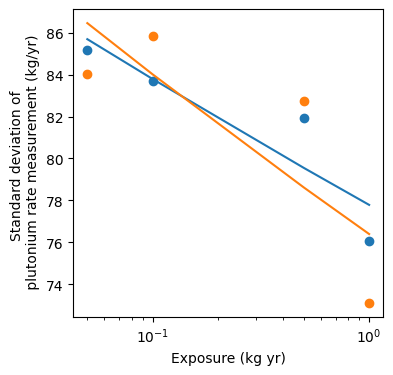

In [20]:
fig, ax = plt.subplots(figsize=(4,4,))

exposures = np.array([1, 0.5, 0.1, 0.05])

def plot_std_devs(ax, stats):
    std_devs = stats.T[1]

    # This does a linear regression of the log values of the exposures and standard deviations
    slope, intercept, r_value, p_value, std_err = linregress(np.log(exposures), np.log(std_devs))

    min_exposure = np.exp((150 - intercept)/slope)
    print(min_exposure)

    std_dev_preds = np.exp ( slope * np.log(exposures) + intercept ) 

    ax.scatter(exposures, std_devs)
    ax.plot(exposures, std_dev_preds)

plot_std_devs(ax, Pu_rate_stats_run8_to_11)
plot_std_devs(ax, Pu_rate_stats_run12_to_15)

ax.set_xlabel('Exposure (kg yr)')
ax.set_ylabel('Standard deviation of \n plutonium rate measurement (kg/yr)')

# ax.text(8e1, 1.5e1, '1 GW PWR \n Ge@5m', fontsize=15)

ax.set_xscale('log')
# ax.set_yscale('log')

Making histograms from the data output by pippi

In [8]:
run_number = 8

post1D_filename = f'./pippi_plotting/PWR_breeder/run{run_number}/parse/PWR_breeder_run{run_number}_6_post1D.ct2'
post1Dhist_filename = f'./pippi_plotting/PWR_breeder/run{run_number}/parse/PWR_breeder_run{run_number}_6_post1Dhist.ct2'

post1D_list = []
with open(post1D_filename, 'r') as file:
    next(file) # skip the header line
    for line in file:
        post1D_list.append([float(f) for f in line.split()])
post1D_array = np.array(post1D_list)

post1Dhist_list = []
with open(post1Dhist_filename, 'r') as file:
    next(file) # skip the header line
    for line in file:
        post1Dhist_list.append([float(f) for f in line.split()])
post1Dhist_array = np.array(post1Dhist_list)        


In [21]:
def get_post1D(run_name, run_number):
    post1D_filename = f'./pippi_plotting/{run_name}/run{run_number}/parse/{run_name}_run{run_number}_6_post1D.ct2'

    post1D_list = []
    with open(post1D_filename, 'r') as file:
        next(file) # skip the header line
        for line in file:
            post1D_list.append([float(f) for f in line.split()])
    post1D_array = np.array(post1D_list)

    return post1D_array

def get_post1Dhist(run_name, run_number):
    post1D_filename = f'./pippi_plotting/{run_name}/run{run_number}/parse/{run_name}_run{run_number}_6_post1Dhist.ct2'

    post1Dhist_list = []
    with open(post1D_filename, 'r') as file:
        next(file) # skip the header line
        for line in file:
            post1Dhist_list.append([float(f) for f in line.split()])
    post1Dhist_array = np.array(post1Dhist_list)

    return post1Dhist_array

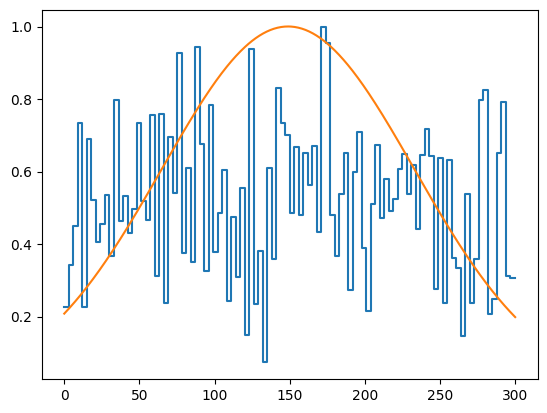

In [29]:
run_name = 'PWR_breeder'
run_number = 15

post1Dhist_array = get_post1Dhist(run_name, run_number)

mu, sigma = get_run_stats(run_name, run_number)

Pu_rate_gaussian = norm(mu, sigma)

Pu_rates = np.linspace(0, 300, 500)

fig, ax = plt.subplots()

ax.plot(*post1Dhist_array.T)

ax.plot(Pu_rates, Pu_rate_gaussian.pdf(Pu_rates)/Pu_rate_gaussian.pdf(150))

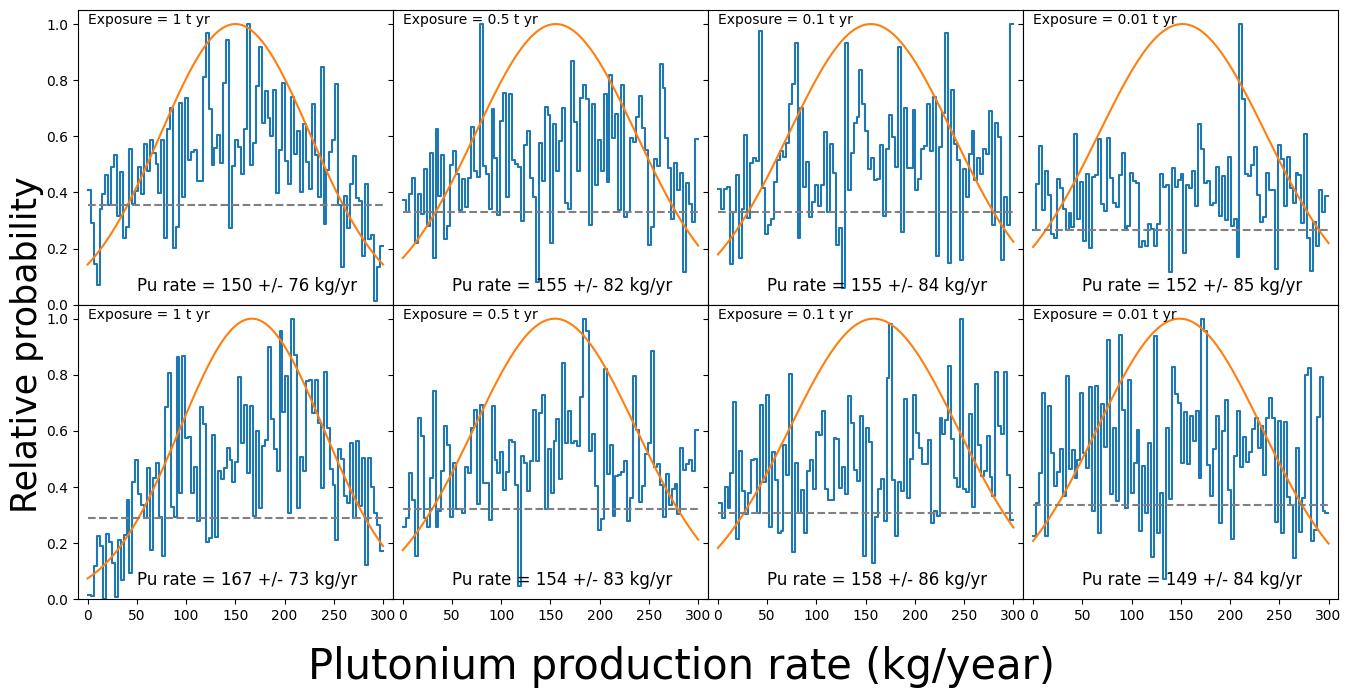

In [147]:
run_name = 'PWR_breeder'
Pu_rates = np.linspace(0, 300, 500)

exposures = [1, 0.5, 0.1, 0.01]

fig, ax_array = plt.subplots(2, 4, figsize=(14,7), sharey=True, sharex=True)

for ax_row, initial_run_number in zip(ax_array, [8, 12]):
    for i, (ax, exposure) in enumerate(zip(ax_row, exposures)):

        run_number = initial_run_number + i

        post1Dhist_array = get_post1Dhist(run_name, run_number)
        mu, sigma = get_run_stats(run_name, run_number)
        Pu_rate_gaussian = norm(mu, sigma)

        CL90_prob, min_Pu_rate = min_Pu_rate_CL90(run_name, run_number)

        ax.plot(*post1Dhist_array.T)

        ax.plot(Pu_rates, Pu_rate_gaussian.pdf(Pu_rates)/Pu_rate_gaussian.pdf(mu))

        ax.hlines(CL90_prob, 0, 300, 'grey', '--')

        ax.text(50, 0.05, f'Pu rate = {mu:.0f} +/- {sigma:.0f} kg/yr', fontsize=12)

        ax.text(0, 1, f'Exposure = {exposure} t yr')

        ax.set_xlim(-10, 310)
        ax.set_ylim(0, 1.05)

fig.supxlabel('Plutonium production rate (kg/year)', fontsize=30)
fig.supylabel('Relative probability', fontsize=25)

fig.tight_layout()

fig.subplots_adjust(wspace=0, hspace=0)

In [ ]:
binned_probabilities = post1Dhist_array[::2].T[1]

In [121]:
isoprob_contours = np.linspace(0, 1, 100)

cl_list = []

for p in isoprob_contours:
    confidence_limit = sum(binned_probabilities[binned_probabilities > p])/sum(binned_probabilities)
    cl_list.append(confidence_limit)


Text(0, 0.5, 'Confidence limit')

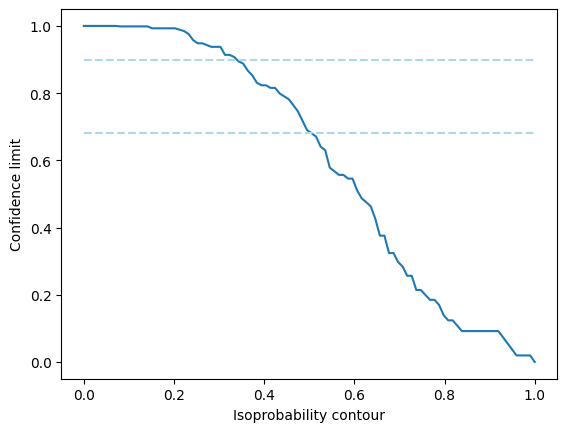

In [122]:
fig, ax = plt.subplots()

ax.plot(isoprob_contours, cl_list)

ax.hlines([0.68, 0.9], 0,1, 'lightblue', '--')

ax.set_xlabel('Isoprobability contour')
ax.set_ylabel('Confidence limit')

Text(0, 0.5, 'Confidence limit')

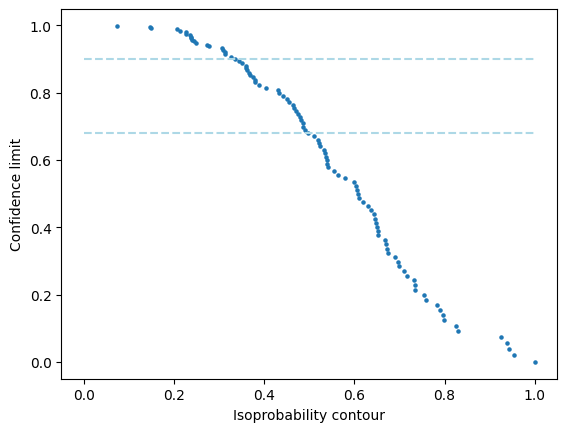

In [130]:
isoprob_contours = np.sort(binned_probabilities)

cl_list = []

for p in isoprob_contours:
    confidence_limit = sum(binned_probabilities[binned_probabilities > p])/sum(binned_probabilities)
    cl_list.append(confidence_limit)

fig, ax = plt.subplots()

ax.scatter(isoprob_contours, cl_list, s=5)

ax.hlines([0.68, 0.9], 0,1, 'lightblue', '--')

ax.set_xlabel('Isoprobability contour')
ax.set_ylabel('Confidence limit')

In [131]:
for i, cl in enumerate(cl_list):
    if cl < 0.9:
        contour_CL90 = isoprob_contours[i-1]
        break

contour_CL90

np.float64(0.33436759570717695)

In [132]:
for i, b_prob in enumerate(binned_probabilities):
    if b_prob > contour_CL90:
        print(i)
        break

1


In [144]:
def min_Pu_rate_CL90(run_name, run_number):
    '''This function returns the isoprobability contour for the 90% confidence interval
    and the Plutonium production rate at the left-most edge of this interval for a given run'''

    post1Dhist_array = get_post1Dhist(run_name, run_number)
    
    binned_probabilities = post1Dhist_array[::2].T[1]

    isoprob_contours = np.sort(binned_probabilities)

    cl_list = []

    for p in isoprob_contours:
        confidence_limit = sum(binned_probabilities[binned_probabilities > p])/sum(binned_probabilities)
        cl_list.append(confidence_limit)

    for i, cl in enumerate(cl_list):
        if cl < 0.9:
            contour_CL90 = isoprob_contours[i-1]
            break

    for bin_index, b_prob in enumerate(binned_probabilities):
        if b_prob > contour_CL90:
            min_Pu_rate = post1Dhist_array[::2][bin_index][0]
            return (contour_CL90, min_Pu_rate)

In [148]:
for run_number in range(8,16):
    print(min_Pu_rate_CL90('PWR_breeder', run_number))

(np.float64(0.3537685359778652), np.float64(0.14559381250495607))
(np.float64(0.3316397810840616), np.float64(0.3321692447776099))
(np.float64(0.3315418656309208), np.float64(0.02467281984248504))
(np.float64(0.2672983659019838), np.float64(3.093520239183178))
(np.float64(0.2913966713446008), np.float64(39.550995073823884))
(np.float64(0.32201550070917045), np.float64(6.334026006230566))
(np.float64(0.30892475926228524), np.float64(0.8006883521775008))
(np.float64(0.33436759570717695), np.float64(3.1097924149272793))


Results from runs 16-19

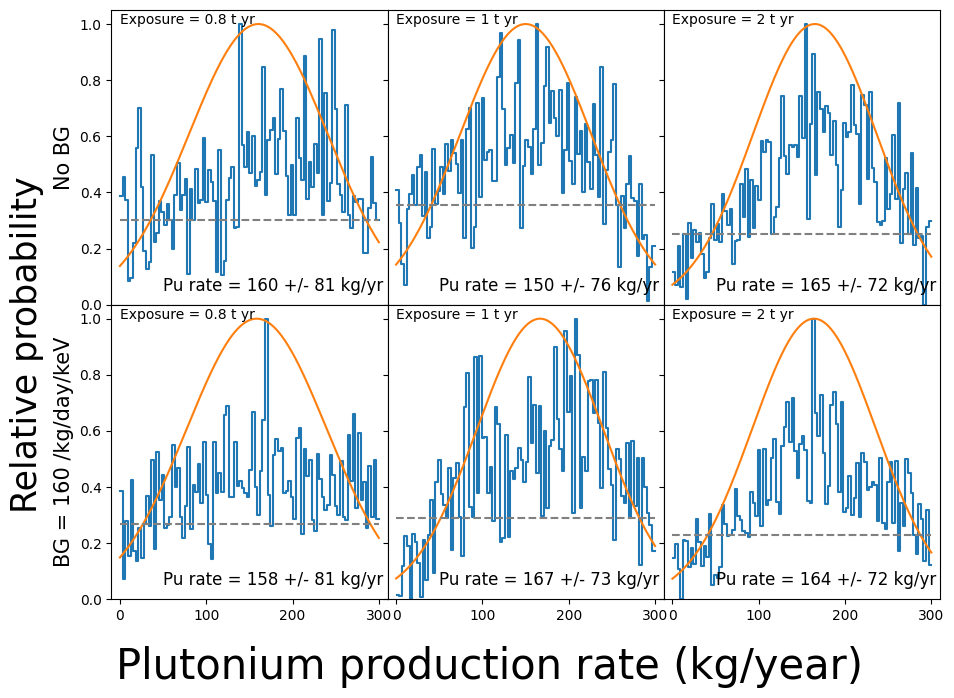

In [159]:
run_name = 'PWR_breeder'
Pu_rates = np.linspace(0, 300, 500)

exposures = [0.8, 1, 2]

fig, ax_array = plt.subplots(2, 3, figsize=(10,7), sharey=True, sharex=True)

no_bg_runs = [16,8,18]
bg_runs = [17,12,19]

for i, (ax_row, run_numbers) in enumerate(zip(ax_array, [no_bg_runs, bg_runs])):
    for j, (ax, run_number, exposure) in enumerate(zip(ax_row, run_numbers, exposures)):
        if j == 0:
            if i == 0:
                ax.set_ylabel('No BG', fontsize=15)
            elif i==1:
                ax.set_ylabel('BG = 160 /kg/day/keV', fontsize=15)
            

        post1Dhist_array = get_post1Dhist(run_name, run_number)
        mu, sigma = get_run_stats(run_name, run_number)
        Pu_rate_gaussian = norm(mu, sigma)

        CL90_prob, min_Pu_rate = min_Pu_rate_CL90(run_name, run_number)

        ax.plot(*post1Dhist_array.T)

        ax.plot(Pu_rates, Pu_rate_gaussian.pdf(Pu_rates)/Pu_rate_gaussian.pdf(mu))

        ax.hlines(CL90_prob, 0, 300, 'grey', '--')

        ax.text(50, 0.05, f'Pu rate = {mu:.0f} +/- {sigma:.0f} kg/yr', fontsize=12)

        ax.text(0, 1, f'Exposure = {exposure} t yr')

        ax.set_xlim(-10, 310)
        ax.set_ylim(0, 1.05)

fig.supxlabel('Plutonium production rate (kg/year)', fontsize=30)
fig.supylabel('Relative probability', fontsize=25)

fig.tight_layout()

fig.subplots_adjust(wspace=0, hspace=0)